# CPR

I need a definitive solution to determining CPR. 

Options:
    * BBG has CPR for some mortgage pools
    * UPB of paid off loans / original balance
    * UPB vs. predicted UPB based on WAC and prior-month UPB
    * Something from loan-level data

First thing I should do is see if I can't match BBG CPR with UPB data or other pool-level data.


Popova <a href=http://projecteuclid.org/download/pdf_1/euclid.ba/1340370553>states</a> that the scheduled monthly payment is defined as follows:

In [1]:
import os
os.chdir("/home/charles/src/LondonMirror/Prepayments/")
import prepayments as pp
import pandas as pd
import numpy as np
import datetime

In [2]:
import ggplot as gg

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
gnm_pool = pp.gnm_data.GNM_Pool()

In [5]:
gnm_pool.pools_table[600000]

(4496650, 1333252800, '36209AR69', 1, 4064, 2609494, 5156400, 999, 96, 99999, 99999, 170, 360, 168, 0, 0, 0, 18000, 'Wells Fargo Bank, Na,                   ', 3355, 0, 0, 0, 0, 0, 0, 0, 5156400, 999, 96, 99999, 99999, 170, 360, 168, 5156400, 999, 96, 99999, 99999, 170, 360, 168, 3836900, 999, 92, 99999, 99999, 170, 360, 145, 0, 0, 0, 2, 1, 5936, 3811894, 495481200, 18000, 0, 886309200, 1834203600, '465909', 'SF', 0, 0, 0, 0, 2, 10000, 6421388, 0, 0, 0, 7500, 9999, 5156400, 999, 96, 99999, 99999, 170, 360, 168, 8000, 99999, 170, 360, 158, 999, 0, 94)

In [6]:
bbg = pp.Bloomberg()

In [7]:
cusip = gnm_pool.pools_table[600000]["cusip"]

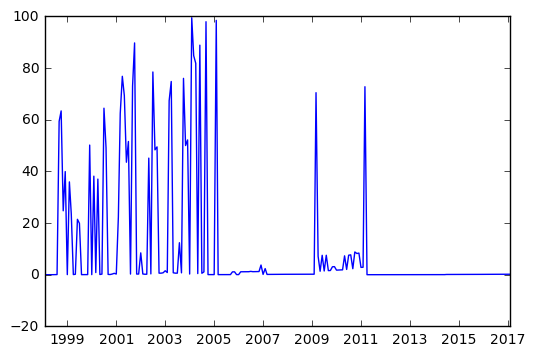

In [8]:
cpr_bbg = bbg.get_cpr("36209AR69")
cpr_bbg.plot()

In [9]:
p_data = gnm_pool.pools_table.read_where("cusip == '36209AR69'")
p_data.shape

(59,)

In [10]:
p_data = pd.DataFrame(p_data, index=[pp.dt_from_ts(x) for x in p_data["as_of_date"]], columns=p_data.dtype.names)
p_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 2012-02-01 to 2016-12-01
Data columns (total 93 columns):
aols                                          59 non-null int64
as_of_date                                    59 non-null int32
cusip                                         59 non-null object
few_units_number_of_loans                     59 non-null int32
few_units_pct_of_upb                          59 non-null int32
few_units_upb                                 59 non-null int64
first_quartile_aols_q1                        59 non-null int64
first_quartile_cltv_q1                        59 non-null int16
first_quartile_ltv_q1                         59 non-null int16
first_quartile_wac_q1                         59 non-null int32
first_quartile_wagm_q1                        59 non-null int32
first_quartile_wala_q1                        59 non-null int16
first_quartile_waolt_q1                       59 non-null int16
first_quartile_warm_q1                        59 non

In [11]:
p_data.index[0]

datetime.date(2012, 2, 1)

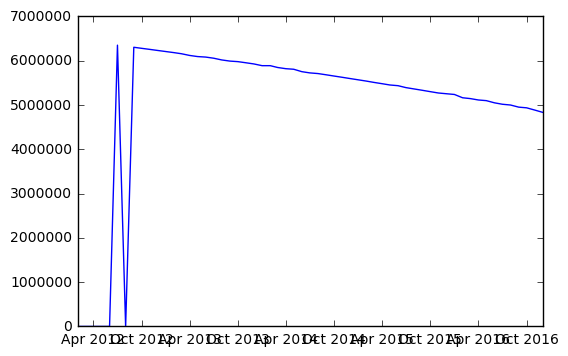

In [12]:
p_data['pool_upb'].plot()

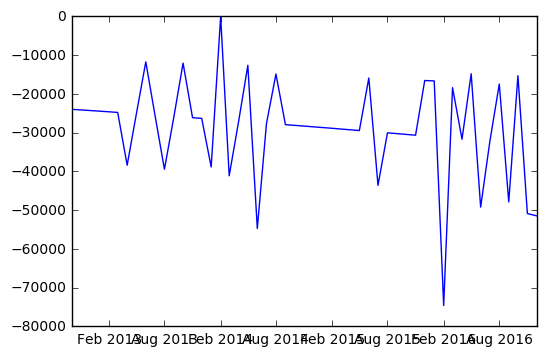

In [13]:
p_data['pool_upb'].diff().ix[datetime.date(2012,10,1):].plot()

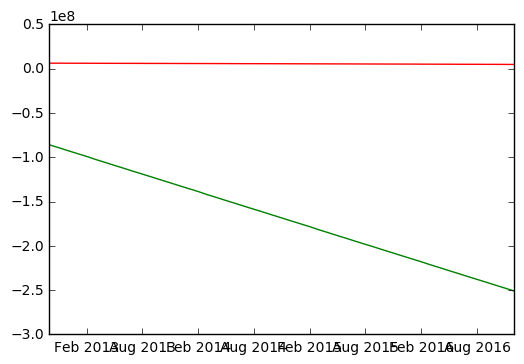

In [14]:
#(p_data['pool_upb'].diff() + p_data['pool_upb'] *(p_data['wac'] / 1200000.)).ix[datetime.date(2012,10,1):].plot()
p_data['pool_upb'].ix[datetime.date(2012,10,1):].plot(color="red")
(p_data['original_aggregate_amount'] * (1-p_data['wala'] * (p_data['wac'] / 1200000.))).ix[datetime.date(2012,10,1):].plot(color="green")

shouldn't be positive ever.

Wonder what % of loans have bbg cpr data

In [15]:
from prepayments.bloomberg_data import CPR_Data

In [16]:
cpr_data = CPR_Data()

In [17]:
samples = [gnm_pool.pools_table[i]['cusip'] for i in np.random.choice(14151801,1000)]

In [19]:
import warnings
warnings.filterwarnings('ignore')
missing = []
for i, cusip in enumerate(samples):
    jim = cpr_data.get_cpr_for_cusip(cusip)
    if jim is None:
        missing.append(cusip)
    if i % 25 == 0:
        print "{:.0%}".format(float(i) / len(samples))

ERROR:root:No CPR data for 36215ACE0


0%


ERROR:root:No CPR data for 36203APX8
ERROR:root:No CPR data for 36220BB36
ERROR:root:No CPR data for 3621965P8
ERROR:root:No CPR data for 36209EDS8


2%


ERROR:root:No CPR data for 36209KAG3
ERROR:root:No CPR data for 36209QL29


5%


ERROR:root:No CPR data for 362151HX3


8%


ERROR:root:No CPR data for 36296W7G5
ERROR:root:No CPR data for 362170EN8
ERROR:root:No CPR data for 362174BA1
ERROR:root:No CPR data for 36297JMU5


10%


ERROR:root:No CPR data for 36216XQ46
ERROR:root:No CPR data for 362148GV4


12%
15%


ERROR:root:No CPR data for 36204CT27
ERROR:root:No CPR data for 36209B5V6
ERROR:root:No CPR data for 36224EUC5
ERROR:root:No CPR data for 36216YYE3
ERROR:root:No CPR data for 36219GX75
ERROR:root:No CPR data for 36217GF44


18%


ERROR:root:No CPR data for 36211KHC1
ERROR:root:No CPR data for 36212QR85
ERROR:root:No CPR data for 36224LKY2


20%


ERROR:root:No CPR data for 36219TCQ8


22%


ERROR:root:No CPR data for 36206TDY5
ERROR:root:No CPR data for 36230QFF0


25%


ERROR:root:No CPR data for 36230QLW6
ERROR:root:No CPR data for 36224AF48
ERROR:root:No CPR data for 36218MQ22
ERROR:root:No CPR data for 362194FG2
ERROR:root:No CPR data for 36291VZB2


28%


ERROR:root:No CPR data for 36211AKE5


30%


ERROR:root:No CPR data for 36210WJD2
ERROR:root:No CPR data for 36204FW34
ERROR:root:No CPR data for 36292BE69


32%


ERROR:root:No CPR data for 36223E3H5
ERROR:root:No CPR data for 36296H3M9


35%


ERROR:root:No CPR data for 36216NSW4


38%


ERROR:root:No CPR data for 3620AQF40
ERROR:root:No CPR data for 36224YVY2
ERROR:root:No CPR data for 36217RDC4
ERROR:root:No CPR data for 36205VEN4


40%


ERROR:root:No CPR data for 36217GQ75
ERROR:root:No CPR data for 36217WW57


42%
45%


ERROR:root:No CPR data for 36213PJ77
ERROR:root:No CPR data for 36208NBA0


48%


ERROR:root:No CPR data for 36296GKF7
ERROR:root:No CPR data for 36294UJH6


50%


ERROR:root:No CPR data for 36200XL56
ERROR:root:No CPR data for 36214PKJ8
ERROR:root:No CPR data for 36224GKT4


52%


ERROR:root:No CPR data for 36218VCV3


55%
57%


ERROR:root:No CPR data for 36211EAL2
ERROR:root:No CPR data for 36218VQH9
ERROR:root:No CPR data for 36224E6R9
ERROR:root:No CPR data for 36202ADJ3


60%


ERROR:root:No CPR data for 36202DKS9


62%


ERROR:root:No CPR data for 36295DT66
ERROR:root:No CPR data for 36205X5C4
ERROR:root:No CPR data for 36213MWT1


65%


ERROR:root:No CPR data for 36205CFH8
ERROR:root:No CPR data for 36211JUS4
ERROR:root:No CPR data for 36297ANB5


68%


ERROR:root:No CPR data for 362173EV4


70%


ERROR:root:No CPR data for 36206VAG2
ERROR:root:No CPR data for 36215JJ95


72%


ERROR:root:No CPR data for 36204C3G4
ERROR:root:No CPR data for 36291LYV1
ERROR:root:No CPR data for 36218BZZ3
ERROR:root:No CPR data for 36208Y5C9


75%


ERROR:root:No CPR data for 36216JP63


78%


ERROR:root:No CPR data for 36202BA21


80%


ERROR:root:No CPR data for 36216WZD8


82%


ERROR:root:No CPR data for 36207KAK6


85%


ERROR:root:No CPR data for 36215FCB5
ERROR:root:No CPR data for 36217JBA8
ERROR:root:No CPR data for 36208DM44


88%


ERROR:root:No CPR data for 36218EHE4


90%
92%


ERROR:root:No CPR data for 36204WQ91
ERROR:root:No CPR data for 36296HRW1
ERROR:root:No CPR data for 36210KK20
ERROR:root:No CPR data for 36207WTE4


95%


ERROR:root:No CPR data for 36224CYH4
ERROR:root:No CPR data for 36202WET2


98%


In [21]:
len(missing) / float(len(samples))

0.084

So, most of them. We have similar fail rates for other missing data, especially WAC. Ok. Let's proceed with Bloomberg CPR.